In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=18aa81f0e49652d0c71fe6d305ad38871daacd86c4dced800a6cdf601488172c
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [3]:
import import_ipynb

In [4]:
%cd /content/drive/MyDrive/A62_projet_synthese_feature/notebook

/content/drive/MyDrive/A62_projet_synthese_feature/notebook


In [5]:
%run iteration_01_0_imports.py

In [6]:
%run iteration_01_0_parameters.py

In [7]:
import iteration_01_0_utils as utils

importing Jupyter notebook from iteration_01_0_utils.ipynb


In [28]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DATE_TIME                str                       2021-11-18_20-39-00
HEALTHY                  str                       H
IMG_SIZE                 int                       400
Image                    module                    <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
NBR_SAMPLE               int                       20
PATH_DATA                str                       ../data
PATH_DATA_EDA            str                       ../data/eda
PATH_DATA_LIST           str                       ../data/list
PATH_DATA_SAMPLE         str                       ../data/sample
PATH_MODEL               str                       ../model
PATH_ROOT                str                       ..
PATH_SOURCE_IMG          str                       /content/drive/MyDrive/A6<...>_synthese_lnk/cell_images
RandomForestClassifier   ABCMeta                   <class 'sklear

In [8]:
DATE_TIME = "2021-11-18_20-39-00"

"""
PATH_SAMPLE = "data/sample"
HEALTHY = "H"
SICK = "S"
IMG_SIZE = 400
"""

'\nPATH_SAMPLE = "data/sample"\nHEALTHY = "H"\nSICK = "S"\nIMG_SIZE = 400\n'

# Modele

## make X, y

In [9]:
PATH_DATA_SAMPLE

'../data/sample'

In [10]:
NBR_SAMPLE

20

In [11]:
DATE_TIME

'2021-11-18_20-39-00'

In [12]:
IMG_SIZE

400

In [13]:
# get list 
list_path_sample_img = []
list_path_sample_img.extend(glob.glob(PATH_DATA_SAMPLE+"/"+DATE_TIME+ "/"+ "*.pkl"))

In [14]:
X = np.zeros((NBR_SAMPLE, IMG_SIZE * IMG_SIZE * 3))

In [15]:
# y = np.chararray(NBR_SAMPLE)
y = np.array([""] * NBR_SAMPLE)

In [16]:
for i, path in tqdm(enumerate(list_path_sample_img)):
    
    X[i] = utils.pickel_read(path).ravel()
    
    _, file_name, _ = utils.split_file_info(path)
    y[i] = file_name[0]

20it [00:06,  3.31it/s]


## Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(random_state = 0)

In [19]:
# lire les pkl 
# recuperer le S et H (labels)

In [20]:
# decouper train / validation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0) 

In [23]:
from datetime import datetime 

In [24]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluate(model, X_train, X_test, y_train, y_test, cv = 5):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cbar = False,
                     xticklabels=np.unique(y_train), 
                     yticklabels=np.unique(y_train),
                     fmt='5d') # cells are counts
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Réel');
    print(classification_report(y_test, y_pred))
    print("on y est")

    """
    # ===
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = cv, 
                                               train_sizes =np.linspace(0.1, 1, 10),
                                                scoring = 'f1_micro'
                                          )
    plt.figure(figsize=(12,8))
    axes = plt.gca()
    axes.set_ylim([0.5,1.05])
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation_score')
    plt.legend()
    plt.show()
    # ---
    """

2021-11-25 00:48:16.465041
              precision    recall  f1-score   support

           H       0.50      0.50      0.50         2
           S       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

on y est
2021-11-25 00:48:16.831221


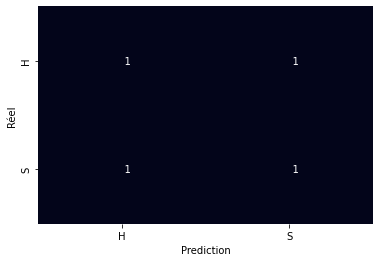

In [25]:
print(datetime.now())
evaluate(clf, X_train, X_test, y_train, y_test)
print(datetime.now())

In [27]:
# Sauvegarder le modèle
os.makedirs(PATH_MODEL, exist_ok=True)
utils.pickel_save(clf, PATH_MODEL + "/" + "model_rf.pkl")